In [1]:
from LinearModel import LinearModel    
import matplotlib.pyplot as plt   
import numpy as np

2024-05-16 11:14:00.637271: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 11:14:00.637537: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:14:00.641968: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:14:00.721114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 11:14:03.009534: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Fix all parameters and let sigma vary

/home/yggdrasil/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


m: [[1.9662025]], b: [0.99960196]
m: [[1.924793]], b: [0.9727222]
m: [[1.9708422]], b: [0.94540775]
m: [[2.0162325]], b: [0.91884154]


/tmp/ipykernel_32350/3960942763.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


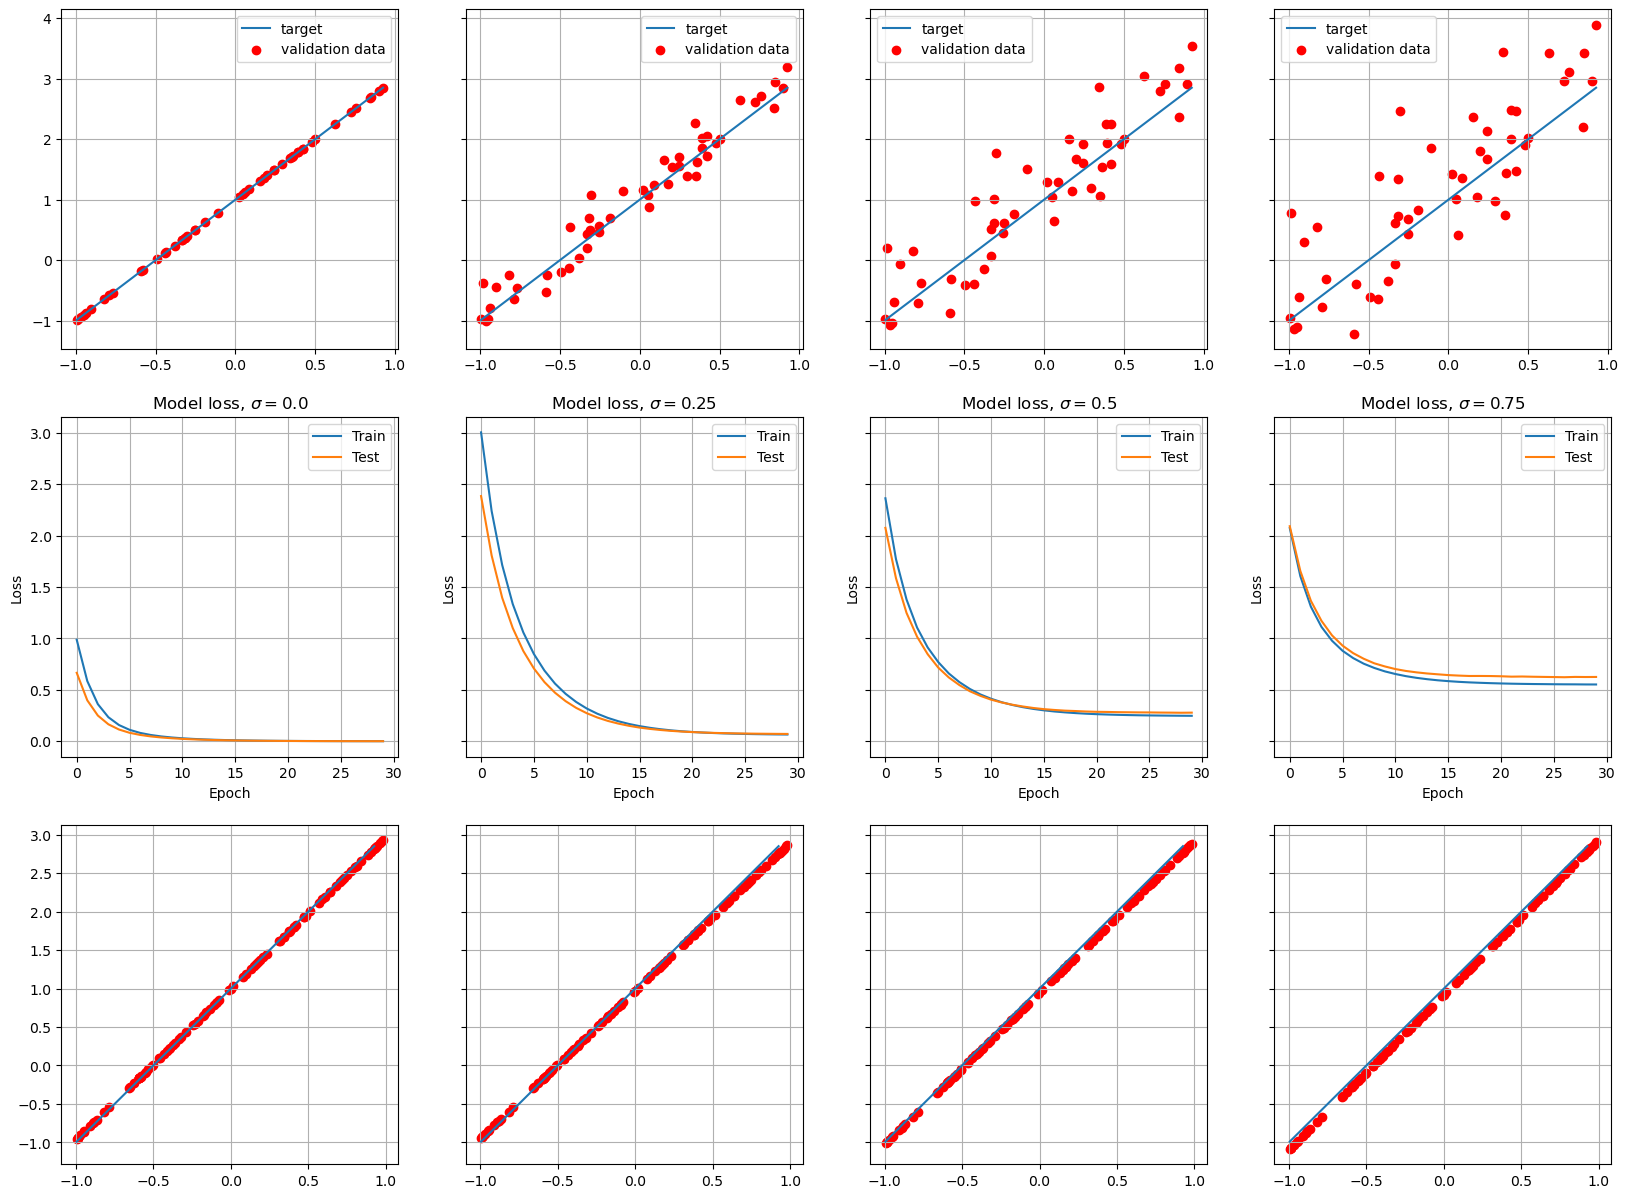

In [3]:
Sigmas = [0.0, 0.25, 0.5, 0.75]

figure, ax = plt.subplots(3, len(Sigmas), sharey = 'row')

figure.set_size_inches(20, 15)

x_predicted = np.random.uniform(-1, 1, 100)

for idx, Sigma in enumerate(Sigmas):

    LM = LinearModel(30, 500, Sigma, m, 1, False)
    LM.TrainModel()
    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title('Model loss, 'r'$\sigma=' + str(Sigma) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(LM.x_valid, LM.y_target)
    predict_ax.grid(True)

figure.show()

Fix all parameters and let N_epochs vary

m: [[1.0412447]], b: [0.9243901]
m: [[1.9354388]], b: [0.97270495]
m: [[2.024831]], b: [0.9729515]
m: [[2.027321]], b: [0.9734472]


/tmp/ipykernel_32350/1852393747.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


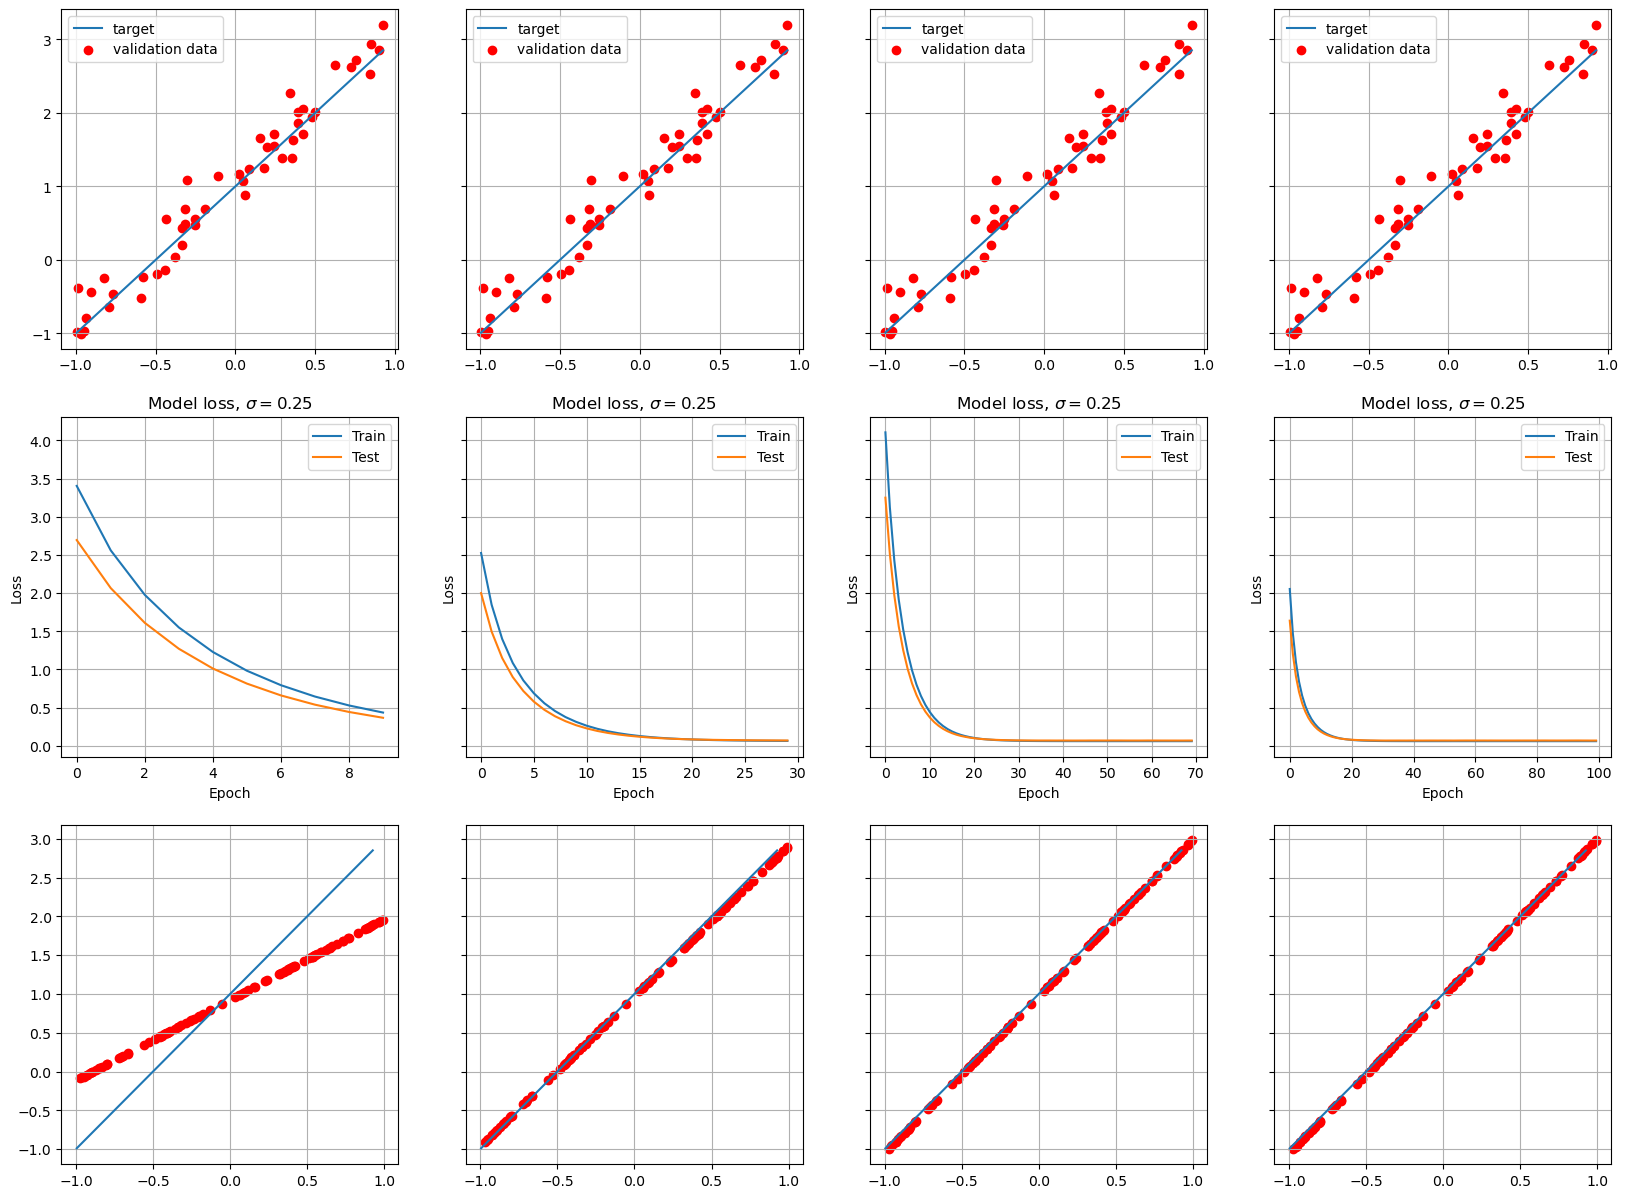

In [4]:
N_Epochs = [10, 30, 70, 100]
Sigma = 0.25

figure, ax = plt.subplots(3, len(N_Epochs), sharey = 'row')

figure.set_size_inches(20, 15)

x_predicted = np.random.uniform(-1, 1, 100)

for idx, N_Epoch in enumerate(N_Epochs):

    LM = LinearModel(N_Epoch, 500, Sigma, m, 1, False)
    LM.TrainModel()
    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title('Model loss, 'r'$\sigma=' + str(Sigma) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(LM.x_valid, LM.y_target)
    predict_ax.grid(True)

figure.show()

Fix all parameters, let N_Train vary

/home/yggdrasil/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


m: [[0.25848106]], b: [0.8893967]
m: [[1.9117144]], b: [0.97216046]
m: [[1.9853195]], b: [1.0082495]
m: [[1.9900779]], b: [0.9941285]


/tmp/ipykernel_32350/2710328901.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


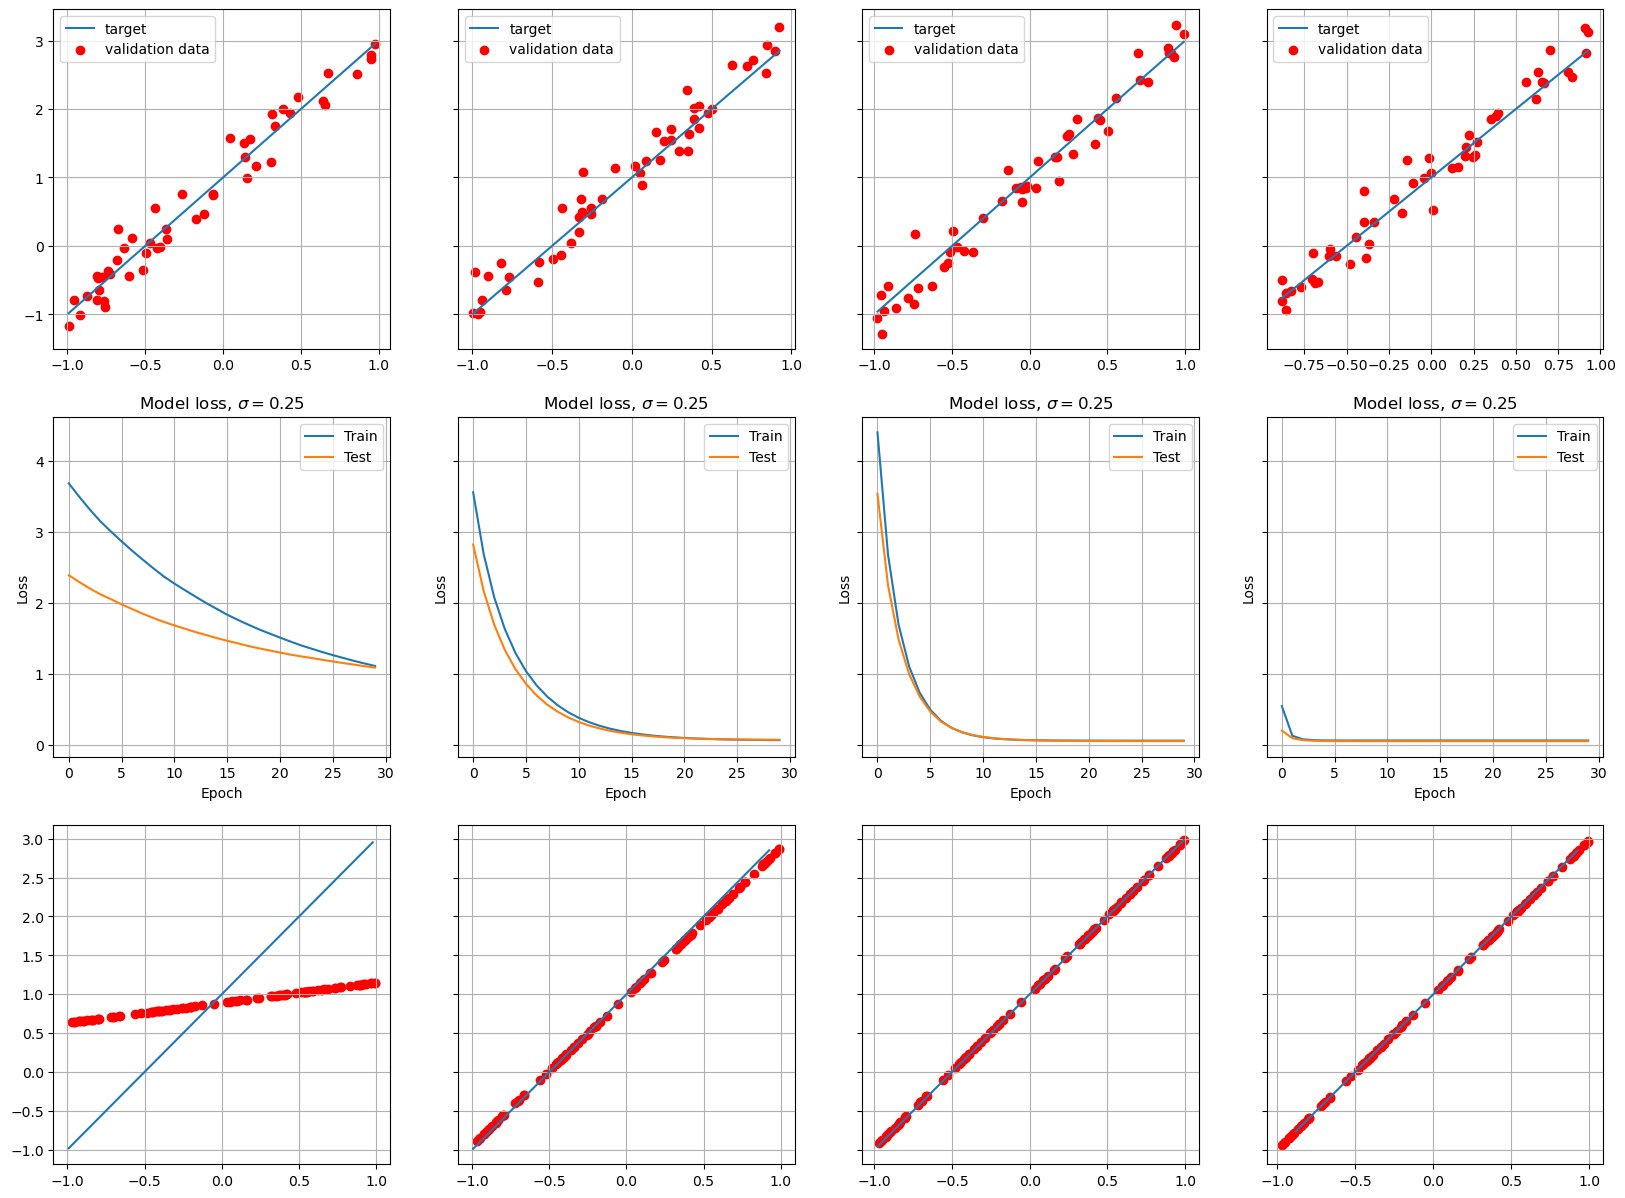

In [5]:
N_Trains = [50, 500, 1000, 3000]
Sigma = 0.25
N_Epoch = 30

figure, ax = plt.subplots(3, len(N_Epochs), sharey = 'row')

figure.set_size_inches(20, 15)

x_predicted = np.random.uniform(-1, 1, 100)

for idx, N_Train in enumerate(N_Trains):

    LM = LinearModel(N_Epoch, N_Train, Sigma, m, 1, False)
    LM.TrainModel()
    LM.GetInfo()

    valid_ax = ax[0][idx]
    loss_ax = ax[1][idx]
    predict_ax = ax[2][idx]

    # plot validation and target dataset
    valid_ax.plot(LM.x_valid, LM.y_target, label='target')
    valid_ax.scatter(LM.x_valid, LM.y_valid, color='r', label='validation data')
    valid_ax.legend()
    valid_ax.grid(True)

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(LM.history.history['loss'])
    loss_ax.plot(LM.history.history['val_loss'])
    loss_ax.set_title('Model loss, 'r'$\sigma=' + str(Sigma) + '$')
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    y_predicted = LM.model.predict(x_predicted, verbose = LM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(LM.x_valid, LM.y_target)
    predict_ax.grid(True)

figure.show()